### Class 03: Statistics, KNN, MNIST
- Generating dataset
- Visualizing distributions, covariance mat
- Implementing KNN
- KNN on MNIST
- `sklearn` KNN
## Links
#### [Visualizing Correlation](https://rpsychologist.com/d3/correlation/)
#### [SKLearn KNN](https://scikit-learn.org/stable/modules/neighbors.html#nearest-neighbors-regression)
#### [MNIST](https://github.com/datapythonista/mnist)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [2]:
mean_01 = np.array([1,2])
cov_01 = np.array([[1,0], [0,1]])
dist_01 = np.random.multivariate_normal(mean_01, cov_01, 1000)
print(dist_01[:2])
print(dist_01.shape)
print("Mean:", dist_01.mean())
print("Mean along axis 0:", dist_01.mean(axis=0))
print("Std:", dist_01.std())

[[1.24050903 0.31931886]
 [0.17137905 3.18149195]]
(1000, 2)
Mean: 1.4834801164013485
Mean along axis 0: [0.97810139 1.98885885]
Std: 1.112974411038873


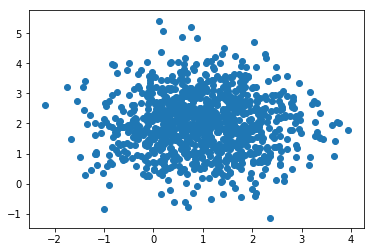

In [3]:
plt.figure()
plt.scatter(dist_01[:, 0], dist_01[:,1])
plt.show()

In [4]:
mean_01 = np.array([0,0])
cov_01 = np.array([[3,0.5], [0.5,1.9]])
dist_01 = np.random.multivariate_normal(mean_01, cov_01, 1000)

mean_02 = np.array([5,6])
cov_02 = np.array([[4,0.2], [0.2,2]])
dist_02 = np.random.multivariate_normal(mean_02, cov_02, 1000)

print(dist_01.shape, dist_02.shape)

(1000, 2) (1000, 2)


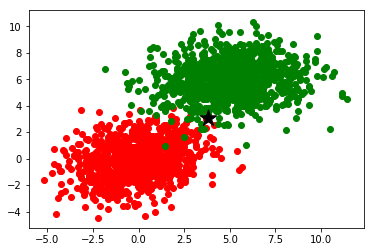

In [5]:
plt.figure()
plt.scatter(dist_01[:, 0], dist_01[:,1], color='red')
plt.scatter(dist_02[:, 0], dist_02[:,1], color='green')
plt.scatter(3.8,3.1, marker='*', color='black', s=300)
plt.show()

In [6]:
# Generating dataset

rows = dist_01.shape[0] + dist_02.shape[0]
cols = dist_01.shape[1] + 1

data = np.zeros((rows, cols))
print(data.shape)

(2000, 3)


In [7]:
data[:dist_01.shape[0], :-1] = dist_01
data[dist_01.shape[0]:, :-1] = dist_02

# Assigning labels
data[:dist_01.shape[0], -1] = 0 # Redundant
data[dist_01.shape[0]:, -1] = 1
print(data[-3:], data.shape, sep='\n')

[[7.7022448  5.64011905 1.        ]
 [2.60671564 6.36443016 1.        ]
 [5.55749275 5.1684632  1.        ]]
(2000, 3)


In [8]:
np.random.shuffle(data)
data[:3]

array([[-2.89251685, -0.22535884,  0.        ],
       [ 4.27290801,  4.23246889,  1.        ],
       [-0.93310216, -1.613274  ,  0.        ]])

In [9]:
# Split
split = int(data.shape[0] * 0.8)
print(split)

# Training & Testing datasets
X_train = data[:split, :-1]
y_train = data[:split, -1]

X_test = data[split:, :-1]
y_test = data[split:, -1]

print(X_train[:3], y_train[:3], sep='\n')

1600
[[-2.89251685 -0.22535884]
 [ 4.27290801  4.23246889]
 [-0.93310216 -1.613274  ]]
[0. 1. 0.]


In [10]:
def euclidean(p1, p2):
    return np.sqrt(np.sum((p1-p2)**2))

euclidean(np.array([1,2,3]), np.array([4,5,6]))

5.196152422706632

In [11]:
def knn(X_train, y_train, test_point, k=5):
    
    distances = [] # Contains list of tuples (distance, label)
    
    for data_point, label in zip(X_train, y_train):
        distances.append((euclidean(test_point, data_point), label))
    #     for i in range(X_train.shape[0]):
    #         data_point = X_train[i]
    #         label = y_train[i]
    
    sorted_distances = sorted(distances, key=lambda x: x[0])
    k_nearest_neighbors = np.array(sorted_distances[:k])
    freq = np.unique(k_nearest_neighbors[:,1], return_counts=True)
    labels, counts = freq
    majority_vote = labels[counts.argmax()]
    return majority_vote
        

In [12]:
print(X_test[33])
knn(X_train, y_train, np.array([3.8, 3.1]))

[-1.68286918 -0.82485094]


1.0

In [13]:
# Calculating accuracy
def calculate_accuracy(X_test, y_test, X_train, y_train, k=5):
    
    predictions = []
    
    for test_point in X_test:
        pred_label = knn(X_train, y_train, test_point, k)
        predictions.append(pred_label)
    
    predictions = np.array(predictions)
    
    accuracy = (predictions == y_test).sum() / y_test.shape[0]
    return accuracy
    
    

In [14]:
calculate_accuracy(X_test, y_test, X_train, y_train)

0.995

# MNIST

In [15]:
dataset = pd.read_csv("/Users/Pratulya/Desktop/machine-learning/bootcamp/mnist_data/train.csv")

In [16]:
dataset.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


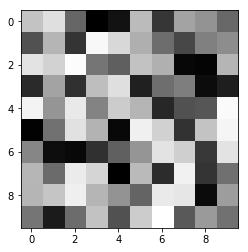

In [17]:
# Plotting images
a = np.random.random((10,10))
plt.figure()
plt.imshow(a, cmap='gray')

In [18]:
data = dataset.values[:5000]
data.shape

(5000, 785)

In [19]:
X, y = data[:,1:], data[:, 0]

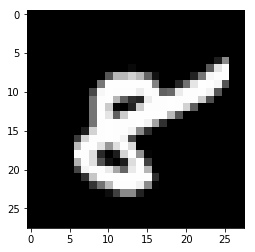

In [20]:
# Plotting digit
im = X[4997].reshape((28,28))
plt.figure()
plt.imshow(im, cmap='gray')

In [21]:
split = int(X.shape[0] * 0.80)
X_train, X_test, y_train, y_test = X[:split], X[split:], y[:split], y[split:]
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)
print(y_train)
print(y_test)

(4000, 784) (4000,)
(1000, 784) (1000,)
[1 0 1 ... 6 6 4]
[8 8 0 5 0 0 3 8 2 1 2 5 6 3 0 6 6 1 3 9 6 0 2 4 6 3 2 7 8 3 2 9 9 4 7 2 7
 8 6 1 5 0 9 5 5 2 5 7 4 0 2 9 8 3 2 1 2 4 6 2 3 3 2 1 6 8 5 5 6 1 8 4 4 4
 7 8 1 2 0 4 5 8 2 3 4 2 7 7 9 4 7 5 9 5 7 0 4 0 6 8 5 8 6 0 4 3 6 2 0 9 1
 4 9 7 9 5 6 2 2 0 8 4 2 9 9 5 9 6 9 0 4 0 9 0 6 6 8 4 8 7 3 1 4 9 0 1 7 0
 7 7 3 3 2 4 0 9 6 1 9 2 8 6 5 0 2 1 7 8 0 0 8 6 1 5 4 0 6 6 9 7 7 1 0 8 6
 3 8 5 6 0 8 7 3 2 3 4 5 9 2 5 7 7 1 8 1 7 5 6 4 4 2 6 9 6 7 9 1 2 1 9 6 8
 1 4 2 0 9 4 0 1 1 9 9 1 7 6 2 9 0 3 4 3 2 5 2 0 5 1 8 5 6 0 6 3 7 3 4 4 6
 7 1 3 6 1 5 1 0 3 5 6 0 4 6 3 3 9 2 3 9 3 9 3 4 2 6 3 4 6 4 2 7 9 7 5 1 9
 6 4 0 6 0 3 0 9 9 5 1 1 7 2 1 6 2 3 0 9 1 6 5 9 5 9 2 1 2 2 2 3 1 2 2 6 8
 9 4 9 9 4 4 7 2 3 3 6 8 1 2 3 6 5 6 7 8 8 4 8 2 6 8 0 1 3 6 7 5 1 6 1 6 1
 3 0 9 0 9 1 3 0 2 1 2 4 3 6 2 5 5 0 2 4 0 2 3 3 1 1 0 4 7 4 0 4 1 1 8 3 8
 5 7 7 4 4 3 6 6 5 4 9 2 5 8 6 5 1 5 7 3 9 5 7 8 8 0 7 0 1 6 8 9 1 1 7 9 8
 7 9 3 7 3 9 3 2 1 1 2 7 3 9 1 0 8 2 3 4 0

In [22]:
calculate_accuracy(X_test, y_test, X_train, y_train, k=5)

0.928

In [23]:
test_df = pd.read_csv("/Users/Pratulya/Desktop/machine-learning/bootcamp/mnist_data/test.csv")

In [24]:
test_df.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [25]:
test_data = test_df.values
test_images = test_data[:10]
test_images.shape

(10, 784)

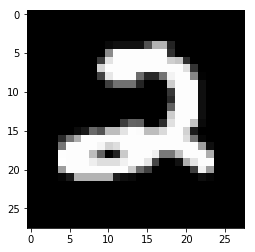

Label: 2.0



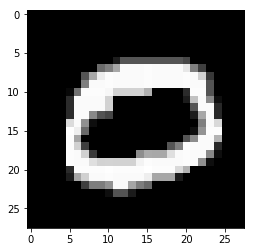

Label: 0.0



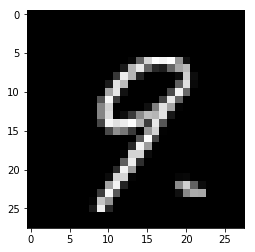

Label: 9.0



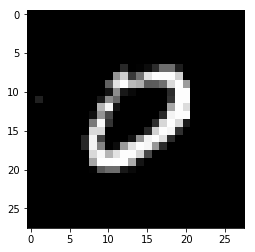

Label: 9.0



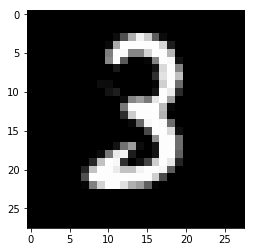

Label: 3.0



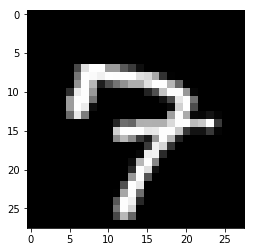

Label: 7.0



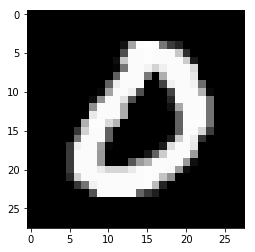

Label: 0.0



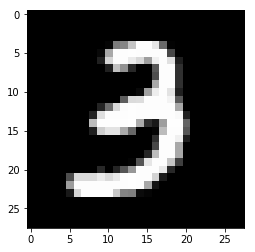

Label: 3.0



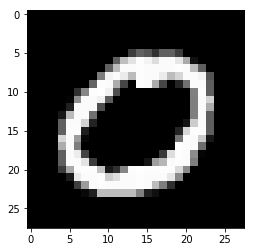

Label: 0.0



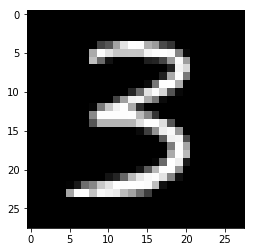

Label: 3.0



In [26]:
for test in test_images:
    im = test.reshape((28,28))
    plt.figure()
    plt.imshow(im, cmap='gray')
    plt.show()
    print("Label:", knn(X_train, y_train, test))
    input()

# Sklearn KNN

In [27]:
from sklearn.neighbors import KNeighborsClassifier

In [28]:
knn_sk = KNeighborsClassifier(n_neighbors=5, p=3) # p=1 Manhattan  p=2 Euclidean

In [29]:
knn_sk.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=3,
           weights='uniform')

In [31]:
knn_sk.score(X_test, y_test)

0.932

In [ ]:
# Try 'predict' method